# 23 Fall MAS 456 Homework 1 Solution.

In [1]:
from ISLP import load_data
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP.models import summarize

### 2-2.

(a)
n = 500(observations)
p = 3(profit, employees, industry)

‘which factors affect CEO salary’ -> inference 

dependent variable = ‘CEO Salary’ -> regression

(b)
n = 20(similar products)
p = 13(price, budget, competition price, 10 other variables)

‘wish to know whether it will be a success or a failure’ -> prediction, classification 

dependent variable = (success or failure)

(c)
n = 52(weekly data for all of 2012)
p = 3(US market, British market, German market)

‘interested in predicting the % change in ~’ -> prediction, regression 

dependent variable = USD/Euro exchange rate

### 2-3.

(a). $\textcolor{red}{+5}$ Sketch:
![bias_variance](figures/hw1_2_3.png)

(b). $\textcolor{red}{+5}$

As the model's flexibility increases, it becomes more inclined to fit the data "perfectly," even with underlying errors such as measurement errors.

This tendency can result in "overfitting," in addition to capturing the relationship between the predictor variable and the response variable.

As a result, we anticipate a potential decrease in training error and bias, increase in variance, accompanied by a "U-shaped" curve in the test error.

It's essential to emphasize that irreducible error, including measurement error, remains unaffected by changes in model flexibility.

### 2-5.

If we need interpretability, then less flexible model might be a good choice. $\textcolor{red}{+5}$

If we need prediction performance, then more flexible model would be better, given that there are enough data. $\textcolor{red}{+5}$

### 2-8. Skipped.

By just following the instruction in the textbook, we can reproduce everything.

### 2-9.

(a) Quantitative: (mpg, cylinders, displacement, horsepower, weight, acceleration);
Qualitative: (cylinders, year, origin, name);


In [2]:
auto = load_data("Auto")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


(b)

In [3]:
qual = ["mpg", "displacement", "horsepower", "weight", "acceleration"]
rng = [(np.min(auto[q]), np.max(auto[q])) for q in qual]
print(np.stack(rng))

[[   9.    46.6]
 [  68.   455. ]
 [  46.   230. ]
 [1613.  5140. ]
 [   8.    24.8]]


(c)

In [4]:
rng = [(np.mean(auto[q]), np.std(auto[q])) for q in qual]
print(np.stack(rng))

[[2.34459184e+01 7.79504576e+00]
 [1.94411990e+02 1.04510444e+02]
 [1.04469388e+02 3.84420327e+01]
 [2.97758418e+03 8.48318447e+02]
 [1.55413265e+01 2.75534291e+00]]


(d)

In [5]:
auto_cut = auto.to_numpy()
indices = [0,2,3,4,5]
auto_cut = np.concatenate([auto_cut[:9,indices], auto_cut[85:, indices]]).T
stats = [(np.min(col), np.max(col), np.mean(col), np.std(col)) for col in auto_cut]
print(np.stack(stats))

[[1.10000000e+01 4.66000000e+01 2.44044304e+01 7.85482473e+00]
 [6.80000000e+01 4.55000000e+02 1.87240506e+02 9.95205233e+01]
 [4.60000000e+01 2.30000000e+02 1.00721519e+02 3.56523072e+01]
 [1.64900000e+03 4.99700000e+03 2.93597152e+03 8.10015488e+02]
 [8.50000000e+00 2.48000000e+01 1.57268987e+01 2.68945512e+00]]


### 3-1.

Null hypothesis: There is no relationship between the predictor variable and the response varialbe, assuming that all other predictors are held constant. $\textcolor{red}{+5}$

We could assert that "newspaper" shows no association with "sales" when keeping other predictors ("TV" and "radio") constant.

However, a non-negligible relationship is observed between "TV" and "sales," assuming other predictors are held constant.

Likewise, a relationship is evident between "radio" and "sales," assuming other predictors are held constant. $\textcolor{red}{+5}$

### 3-4.

(a) Cubic regression is more flexible, which means it fits the training data better. Thus, the training
RSS for cubic regression is smaller than that for linear regression. $\textcolor{red}{+3}$

(b) We compare the values of bias and variance for the two regression methods. There is no difference of bias between linear and cubic regressions, because the true relationship is assumed to be linear. (There is a possibility of lower training RSS for cubic regression, since it can fit the measurement error $\epsilon$.) However, the variance is bigger in cubic regression. Therefore, the test RSS for linear regression is expected to be smaller. $\textcolor{red}{+3}$

(c) Cubic regression is more flexible, which means it fits the training data better. Thus, the training RSS for cubic regression is smaller than that for linear regression. $\textcolor{red}{+2}$

(d) The variance is bigger in cubic regression. However, we cannot compare the values of bias between linear and cubic regressions, because the true relationship is unknown. Therefore, there is not enough information to compare the values of test RSS. $\textcolor{red}{+2}$

### 3-7.

Let $S_{xy} = \sum x_i y_i$.
Then $\text{Cor}^2 = \frac{S_{xy}^2}{S_{xx}S_{yy}}$.
Note that $\hat{\beta}_0 = \overline{y} - \hat{\beta}_1 \overline{x} = 0$ and $\hat{\beta}_1 = \frac{S_{xy}}{S_{xx}}$.
So $\text{RSS} = S_{yy} - \frac{S_{xy}^2}{S_{yy}}$.
Therefore, $\text{R}^2 = \frac{S_{xy}^2}{S_{xx}S_{yy}} = \text{Cor}^2$.

### 3-13.

(a, b) $\textcolor{red}{+2}$

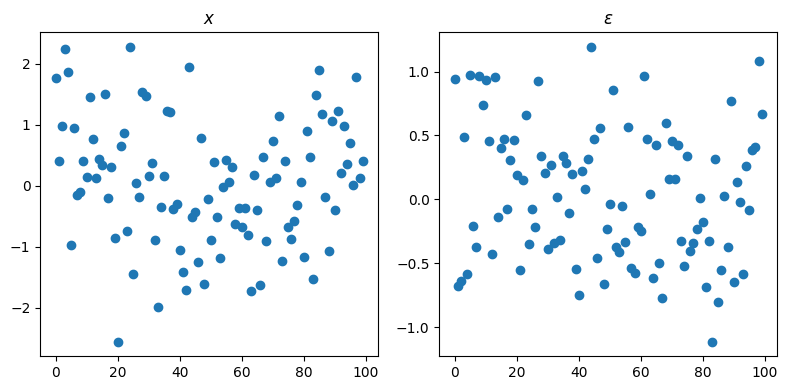

In [6]:
np.random.seed(seed=0)

x = np.random.normal(loc=0,scale=1,size=(100,))
eps = np.random.normal(loc=0,scale=np.sqrt(0.25),size=(100,))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8,4))
ax0.plot(x, 'o')
ax0.set_title(r'$x$')
ax1.plot(eps, 'o')
ax1.set_title(r"$\epsilon$")
plt.tight_layout()
plt.show()

(c, d) $\textcolor{red}{+3}$ Of course $\beta_0 = -1$ and $\beta_1 = 0.5$. The length of the vector $Y$ is 100.

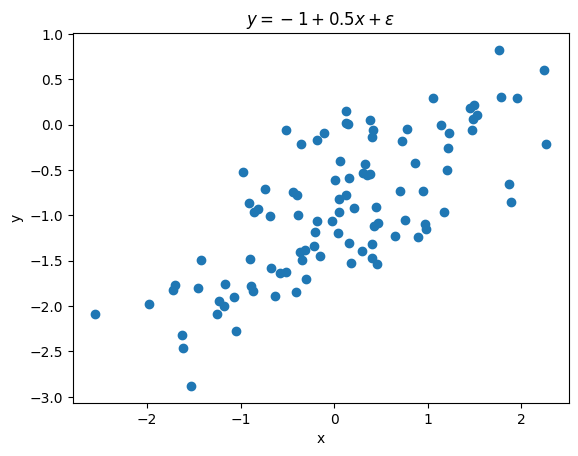

In [7]:
y = -1 + 0.5*x + eps

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r"$y = -1 + 0.5x + \epsilon$")
plt.show()

(e, f) $\textcolor{red}{+3}$ $\hat{\beta}_0 = -0.9624$ and $\hat{\beta}_1 = 0.5573$, which are quite close to the true values.

In [8]:
X = np.stack([np.ones((100,)), x], 1)
model = sm.OLS(y, X)
results = model.fit()

print(summarize(results))

         coef  std err       t  P>|t|
const -0.9624    0.052 -18.500    0.0
x1     0.5573    0.052  10.817    0.0


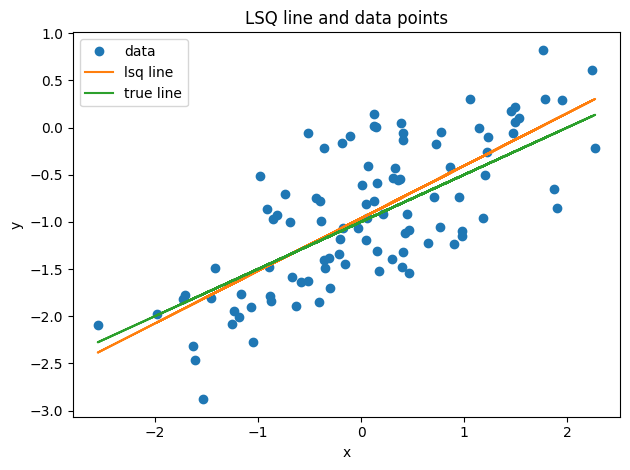

In [9]:
model_line = results.get_prediction(X).predicted_mean

plt.plot(x, y, 'o', label="data")
plt.plot(x, model_line, label="lsq line")
plt.plot(x, -1+0.5*x, label="true line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("LSQ line and data points")
plt.legend()
plt.tight_layout()
plt.show()

(g) $\textcolor{red}{+2}$ Since corresponding p-value of $\hat{\beta}_2$ is very big, we would say there is no effect of $x^2$.

In [10]:
X_sq = np.concatenate([X, (x**2).reshape(-1,1)], 1)
results_qmod = sm.OLS(y, X_sq).fit()

print(summarize(results_qmod))

         coef  std err       t  P>|t|
const -0.9286    0.066 -14.047  0.000
x1     0.5615    0.052  10.829  0.000
x2    -0.0334    0.040  -0.830  0.409


(h, i) $\textcolor{red}{+3}$ Code: skip. We may earn (better, worse) estimates $\hat{\beta}_i$'s than previous values.

(j) $\textcolor{red}{+2}$ Code: skip. From original dataset, we obtain $(-1.06566085, -0.85918606)$ and $(0.45509907, 0.65959937)$ for $\hat{\beta}_0$ and $\hat{\beta}_1$ resepctively.
For the noisier dataset, the widths of confidence intervals would be larger, and vice versa.

In [11]:
ci_0, ci_1 = results.conf_int()

print(f"CI for intercept:{ci_0}, and CI for coefficient:{ci_1}")

CI for intercept:[-1.06566085 -0.85918606], and CI for coefficient:[0.45509907 0.65959937]


### 3-14.

(a, b) $y = 2 + 2x_1 + 0.3x_2 + e_1$, where $e_1 \sim N(0,1)$.
Further, $x_2 = 0.5 x_1 + 0.1 e_2$, so we may write $y = 2 + 2.15 x_1 + e_1 + 0.03e_2$,
where $e_2 \sim N(0,1)$ also.

Therefore, $\beta_0 = 2$ and $\beta_1 = 2.15$.

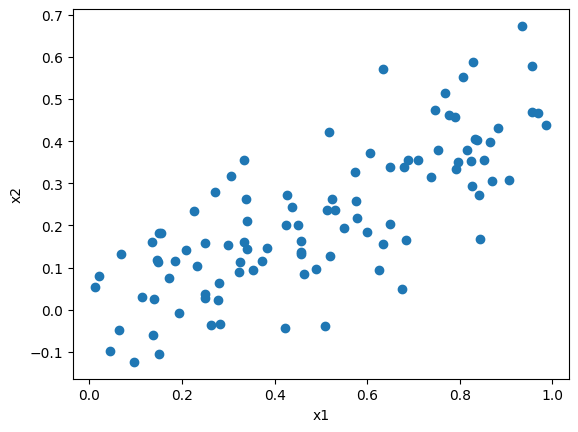

In [12]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0,1, size=100)
x2 = 0.5*x1 + 0.1*rng.normal(size=100)
y = 2+ 2*x1 + 0.3*x2 + rng.normal(size=100)

plt.plot(x1, x2, 'o')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

(c) The estimated coefficients are presentented below. We can reject $\beta_1 = 0$ under the significance level $\alpha = 0.05$, but cannot reject $\beta_2 = 0$.

In [13]:
X = np.stack([np.ones(100,), x1, x2], 1)
results_col = sm.OLS(y, X).fit()

print(summarize(results_col))

         coef  std err       t  P>|t|
const  1.9579    0.190  10.319  0.000
x1     1.6154    0.527   3.065  0.003
x2     0.9428    0.831   1.134  0.259


(d) The estimated parameters are below. We can reject the null $\beta_1 = 0$.

In [14]:
X1 = np.stack([np.ones((100,)), x1], 1)
results_1 = sm.OLS(y, X1).fit()

print(summarize(results_1))

         coef  std err       t  P>|t|
const  1.9371    0.189  10.242    0.0
x1     2.0771    0.335   6.196    0.0


(e) Again, we can.

In [15]:
X2 = np.stack([np.ones((100,)), x2], 1)
results_2 = sm.OLS(y, X2).fit()

print(summarize(results_2))

         coef  std err       t  P>|t|
const  2.3239    0.154  15.124    0.0
x1     2.9103    0.550   5.291    0.0


(f) It seems there is a contradiction, since the coefficients of $x_2$ can be regarded as $0$ in (c), but not in (e).
However, this is not a contradiction. We can represent $x_2$ in terms of $x_1$, and this leads redundancy of $\beta_2$ in (c).

(g) The new observation affects model (c) a lot, so it is a high leverage points. It is also an outlier of all three models.

In [16]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

In [17]:
Xnew = np.stack([np.ones((101,)), x1, x2], 1)
c = sm.OLS(y, Xnew).fit()
d = sm.OLS(y, Xnew[:,:-1]).fit()
e = sm.OLS(y, Xnew[:,[0,2]]).fit()

print(summarize(c))
print(summarize(d))
print(summarize(e))

         coef  std err       t  P>|t|
const  2.0618    0.192  10.720  0.000
x1     0.8575    0.466   1.838  0.069
x2     2.2663    0.705   3.216  0.002
         coef  std err       t  P>|t|
const  2.0739    0.201  10.310    0.0
x1     1.8760    0.358   5.236    0.0
         coef  std err       t  P>|t|
const  2.2840    0.151  15.088    0.0
x1     3.1458    0.524   6.008    0.0
